In [2]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

import os
import IPython.display

In [3]:
def load(file_name):
    wav = file_name
    file_sr = librosa.get_samplerate(wav)

    y, sr = librosa.load(wav, sr=file_sr)
    return y, sr

In [251]:
def time_normalization(input_directory, output_directory, length):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        y, origin_sr = load(input_directory+file)
        ratio = length/len(y)
        new_sr = int(origin_sr/ratio)
        sf.write(output_directory+file, y, new_sr, subtype='PCM_16')

In [6]:
y, sr = load("dh2.wav")
resample = librosa.resample(y, sr, 16000)
sf.write('dh2_1.wav', new_audio, sr, subtype='PCM_16') 

In [7]:
y, sr = load("dh2_1.wav")
new_audio = []
max_mine = np.max(y)
ratio = 0.46202388 / max_mine
for i in range(len(y)):
    new_audio.append(y[i] * ratio)
sf.write('dh2_2.wav', new_audio, sr, subtype='PCM_16') 

In [4]:
def decibel_normalization(input_directory, output_directory, decibel):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        new_audio = []
        y, sr = load(input_directory+file)
        max_mine = np.max(y)
        ratio = decibel / max_mine
        for i in range(len(y)):
            new_audio.append(y[i] * ratio)
        sf.write(output_directory+file, new_audio, sr, subtype='PCM_16')   

In [18]:
def resampling(input_directory, output_directory, new_sr):
    file_list = os.listdir(input_directory)
    
    for file in file_list:
        y, sr = load(input_directory+file)
        resample = librosa.resample(y, sr, new_sr)
        sf.write(output_directory+file, resample, new_sr, subtype='PCM_16')   

In [252]:
time_normalization('split/fire/', 'normalization_time/fire/', 38400)
time_normalization('split/non/', 'normalization_time/non/', 38400)

In [286]:
decibel_normalization('normalization_time/fire/', 'normalization_decibel/fire/', 0.72091675)
decibel_normalization('normalization_time/non/', 'normalization_decibel/non/', 0.72091675)

In [5]:
resampling('split/fire/', 'resampling/fire/', 16000)
resampling('split/non/', 'resampling/non/', 16000)

In [4]:
resampling('background/bg/', 'background/background_resampling/', 16000)

In [12]:
decibel_normalization('background/background_resampling/', 'background/background_normalization_decibel/', 0.4395225)

In [9]:
decibel_normalization('origin/test/fire/', 'normalization/test/fire/', 0.46202388)
decibel_normalization('origin/test/non/', 'normalization/test/non/', 0.46202388)

In [7]:
decibel_normalization('augmentation/both/train/fire/', 'augmentation/normalization/train/fire/', 0.46202388)
decibel_normalization('augmentation/both/train/non/', 'augmentation/normalization/train/non/', 0.46202388)

In [8]:
decibel_normalization('background/train/', 'background/normalization/train/', 0.46202388)
decibel_normalization('background/train_negative/', 'background/normalization/train_negative/', 0.46202388)

decibel_normalization('background/test/', 'background/normalization/test/', 0.46202388)
decibel_normalization('background/test_negative/', 'background/normalization/test_negative/', 0.46202388)

In [19]:
resampling('normalization/normalization/train/fire/', 'augmentation/resampling/train/fire/', 16000)
resampling('normalization/normalization/train/non/', 'augmentation/resampling/train/non/', 16000)

In [24]:
directory = 'augmentation/resampling/train/non/'
fire_directory = os.listdir(directory)


for file in fire_directory:
    new_audio = []
    y, sr = load(directory+file)
    print(np.max(y))

0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562
0.46200562

In [ ]:
new_sr = int(sr/ratio)
sf.write('time_normalization/fire', y, new_sr, subtype='PCM_16')
y, sr = load('dj1X2.wav')
resample = librosa.resample(y, sr, 48000)
sf.write("test.wav", resample, 48000, subtype='PCM_16')
y, sr = load('test.wav')

In [24]:
y, sr = load('news_ko.wav')
max = np.max(y)

In [25]:
max

0.72091675

In [37]:
ratio

1.379719

In [297]:
directory = 'split/fire/'
fire_directory = os.listdir(directory)

length = []

for file in fire_directory:
    y, sr = load(directory+file)
    length.append(len(y))

In [302]:
len(length)

65

In [303]:
np.mean(length)

42285.876923076925

In [162]:
mean_len = np.mean(length)

In [239]:
y, sr = load('dj1.wav')

In [217]:
sf.write('222222.wav', y, 48000, subtype='PCM_16')

In [225]:
len(y)

37455

In [182]:
sr

48000

In [240]:
ratio = 38400/len(y)

In [241]:
ratio

1.025230276331598

In [242]:
new_sr = int(sr/ratio)
print(new_sr)
sf.write('dj1X2.wav', y, new_sr, subtype='PCM_16')
y, sr = load('dj1X2.wav')
resample = librosa.resample(y, sr, 48000)
sf.write("test.wav", resample, 48000, subtype='PCM_16')
y, sr = load('test.wav')

46818


In [243]:
len(y)

38401

In [244]:
sr

48000

In [261]:
y, sr = load('dh1.wav')

In [263]:
len(y)

38401

In [264]:
sr

44100

38401 44100


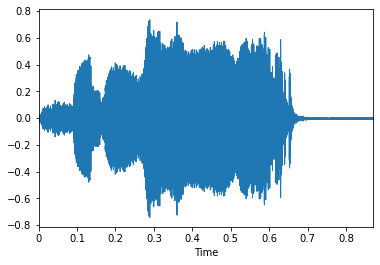

In [267]:
y, sr = load('dh1.wav')
print(len(y), sr)
librosa.display.waveplot(y, sr=sr)

38401 44100


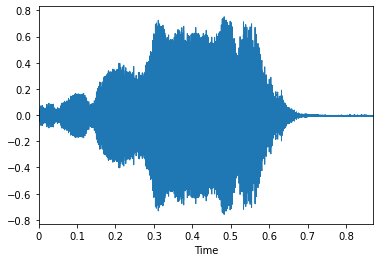

In [268]:
y, sr = load('dh5.wav')
print(len(y), sr)
librosa.display.waveplot(y, sr=sr)

38401 44100


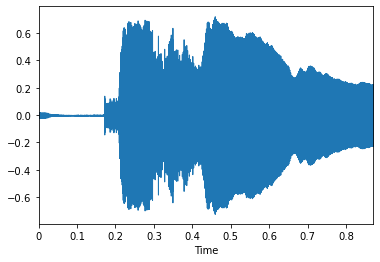

In [269]:
y, sr = load('f1.wav')
print(len(y), sr)
librosa.display.waveplot(y, sr=sr)

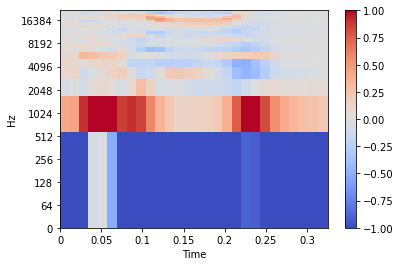

In [279]:
y, sr = load('42.wav')
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

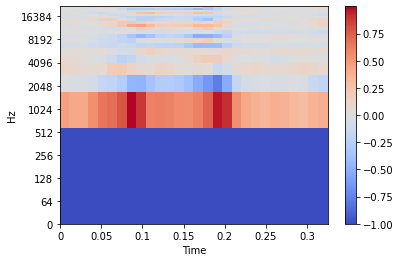

In [281]:
y, sr = load('m2.wav')
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

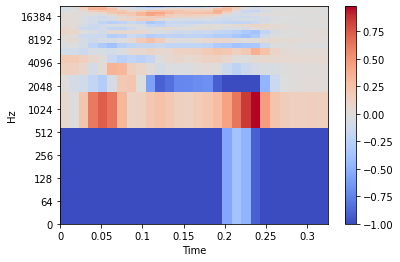

In [275]:
y, sr = load('dh1.wav')
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

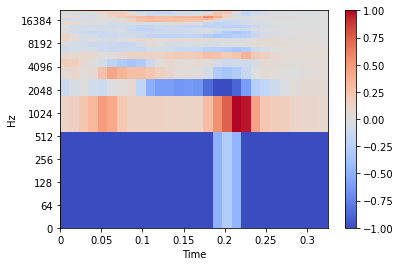

In [276]:
y, sr = load('dh5.wav')
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

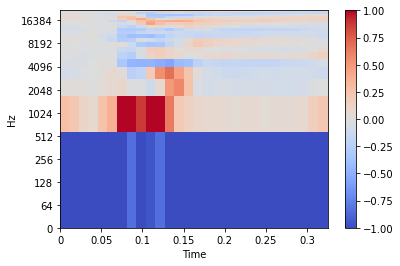

In [277]:
y, sr = load('f1.wav')
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

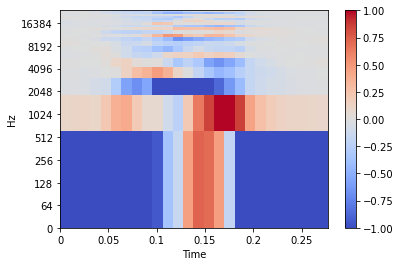

In [278]:
y, sr = load('dj23.wav')
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

In [126]:
resample = librosa.resample(y, sr, 16000)
sf.write("dj1_resample_origin.wav", resample, 16000, subtype='PCM_16')

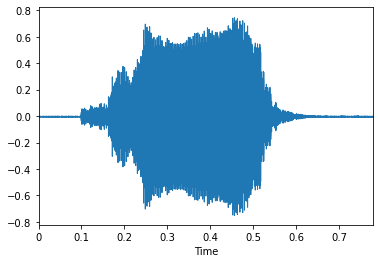

In [127]:
y, sr = load('dj1_resample_origin.wav')

librosa.display.waveplot(y, sr=sr)

In [128]:
sr

16000

In [129]:
len(y)

12485

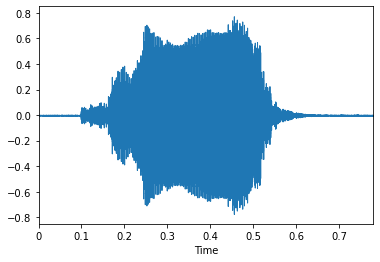

In [106]:
y, sr = load('dj1.wav')

librosa.display.waveplot(y, sr=sr)

In [107]:
len(y)

37455

In [96]:
np.max(y)

0.72091675

In [78]:
max_mine = np.max(y)
ratio = max / max_mine

for i in range(len(y)):
    new_audio.append(y[i] * ratio)

In [79]:
np.max(new_audio)

0.72091675

In [97]:
sr

48000

In [93]:
sf.write('2.wav', y, sr, subtype='PCM_16')

In [102]:
len(y)

37455

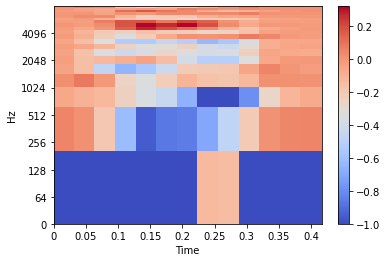

In [131]:
y, sr = load('dj1_resample.wav')
mfcc = librosa.feature.mfcc(y, sr)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

In [132]:
sr

16000

In [21]:
y, sr = load('dj1_resample_origin.wav')
mfcc = librosa.feature.mfcc(y, sr=16000)

mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

FileNotFoundError: [Errno 2] No such file or directory: 'dj1_resample_origin.wav'

In [134]:
sr

16000

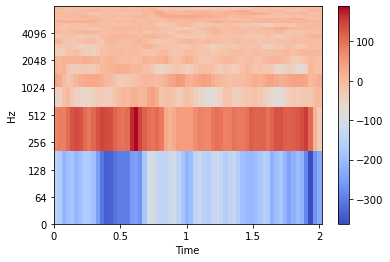

In [25]:
y, sr = load('test.wav')
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

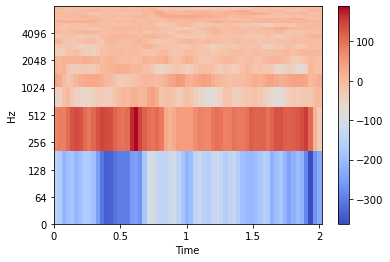

In [28]:
y, sr = load('test.wav')
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

In [ ]:

mfcc = librosa.util.normalize

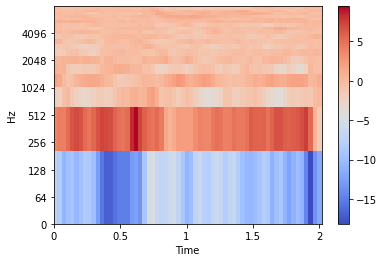

In [16]:
y, sr = load('test.wav')
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc, norm=0)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

In [17]:
np.max(mfcc)

9.44767

In [18]:
np.mean(mfcc)

-0.524564

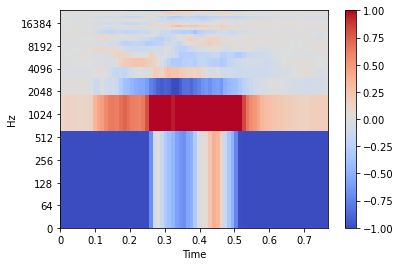

In [67]:
mfcc = librosa.feature.mfcc(y, sr=sr)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

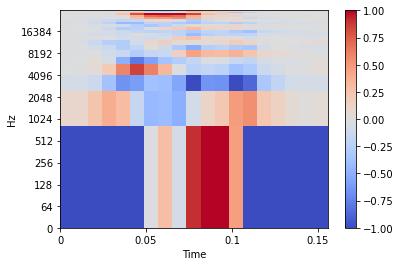

In [86]:
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

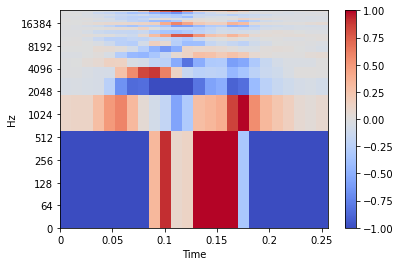

In [68]:
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

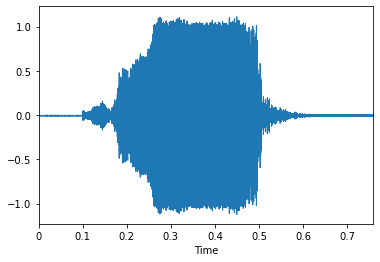

In [70]:
librosa.display.waveplot(resample, sr=16000)

In [71]:
sf.write("1116000.wav", resample, 16000, subtype='PCM_16')

In [16]:
y, sr = load('test.wav')
sr

16000

In [17]:
import numpy as np
pure = np.linspace(-1, 1, 100)
noise = np.random.normal(0, 1, len(y))
signal = y + noise

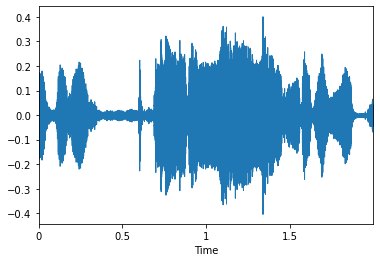

In [18]:
librosa.display.waveplot(y, sr=16000)

In [19]:
noise = np.random.normal(0, .1, y.shape)
new_signal = y + noise
print(new_signal)

[ 0.08032026  0.15844762 -0.08048377 ... -0.15575163  0.12936848
 -0.017019  ]


In [15]:
sf.write('test.wav', new_signal, sr, subtype='PCM_16')

NameError: name 'new_signal' is not defined

In [1]:
y, sr = load('add_noise.wav')
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

NameError: name 'load' is not defined

In [338]:
import pandas as pd

In [372]:
y, sr = load('dh8.wav')

random_state = 42
rnd_state = np.random.RandomState(random_state)

data = np.c_[y]
mu = np.mean(data)
sd = np.std(data)

data_df = pd.DataFrame(data, columns=['Value'])
data_df['Index'] = data_df.index.values

jitter = 0.3*rnd_state.normal(mu, sd, size=data_df.shape[0])
data_df['with_jitter'] = data_df['Value'] + jitter

In [373]:
sf.write('add_noise3.wav', data_df['with_jitter'], sr, subtype='PCM_16')

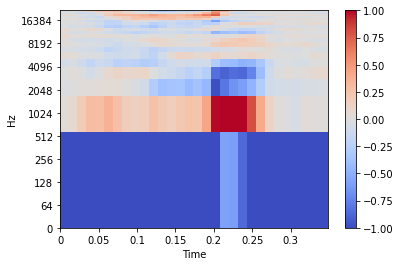

In [377]:
y, sr = load('add_noise2.wav')
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

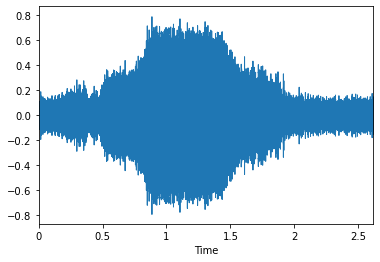

In [378]:
librosa.display.waveplot(y, sr=16000)

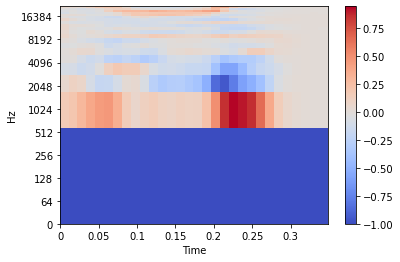

In [347]:
y, sr = load('dh8.wav')
resample = librosa.resample(y, sr, 16000)

mfcc = librosa.feature.mfcc(resample, sr=16000)
mfcc = librosa.util.normalize(mfcc)

librosa.display.specshow(mfcc, y_axis='log', x_axis='time', sr=sr)
plt.colorbar()

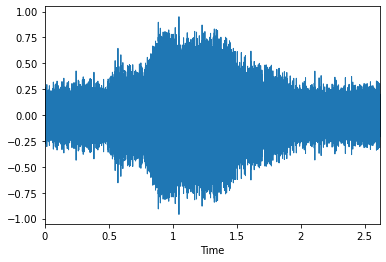

In [319]:
librosa.display.waveplot(y, sr=16000)

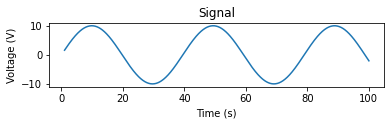

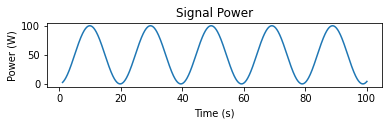

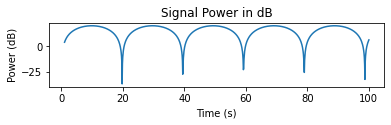

In [309]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(1, 100, 1000)
x_volts = 10*np.sin(t/(2*np.pi))
plt.subplot(3,1,1)
plt.plot(t, x_volts)
plt.title('Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

x_watts = x_volts ** 2
plt.subplot(3,1,2)
plt.plot(t, x_watts)
plt.title('Signal Power')
plt.ylabel('Power (W)')
plt.xlabel('Time (s)')
plt.show()

x_db = 10 * np.log10(x_watts)
plt.subplot(3,1,3)
plt.plot(t, x_db)
plt.title('Signal Power in dB')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()

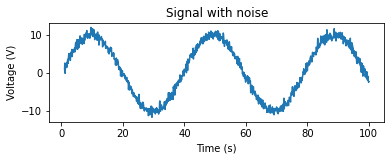

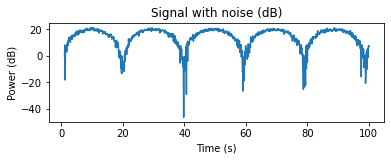

In [310]:
# Adding noise using target SNR

# Set a target SNR
target_snr_db = 20
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(x_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
# Noise up the original signal
y_volts = x_volts + noise_volts

# Plot signal with noise
plt.subplot(2,1,1)
plt.plot(t, y_volts)
plt.title('Signal with noise')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()
# Plot in dB
y_watts = y_volts ** 2
y_db = 10 * np.log10(y_watts)
plt.subplot(2,1,2)
plt.plot(t, 10* np.log10(y_volts**2))
plt.title('Signal with noise (dB)')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()